<a href="https://colab.research.google.com/github/PavlovGeorgiy/portfolio/blob/main/%D0%9A%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D1%8F_%D0%B8_%D0%BA%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

Задание 1.
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

*   Построить точечный график
*   Рассчитать коэффициенты корреляции Пирсона и Спирмена
*   Построить модель линейной регрессии
*   Рассчитать коэффициент детерминации
*   Вывести график остатков

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('water.csv')
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


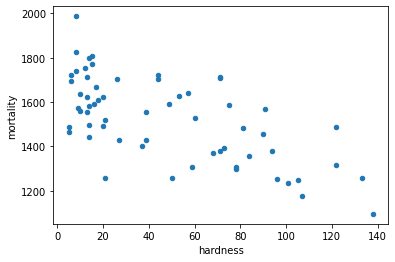

In [ ]:
# визуализируем взаимосвязь жесткости воды и смертности
df.plot(kind='scatter', x='hardness', y='mortality')

In [ ]:
# считаем коэф. корреляции Пирсона
df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


Есть слабая обратная связь между показателями жесткости воды и смертности

In [ ]:
# считаем коэф. корреляции Спирмана
df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [ ]:
# строим модель линейной регрессии

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['hardness']]
y = df['mortality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
X_train.shape

(42, 1)

In [ ]:
X_test.shape

(19, 1)

In [ ]:
y_train.shape

(42,)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.coef_ # коэффициент детерминации

array([-3.13167087])

отрицательное значение возможно из-за маленькой выборки

In [ ]:
model.intercept_

1668.9722977277095

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [ ]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

0.5046490611017092

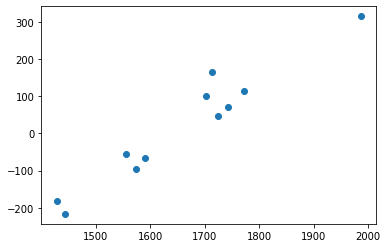

In [ ]:
# визуализация остатков
err_x = y_test
err_y = y_test - y_pred
plt.scatter(err_x, err_y)

**Вывод**: есть обратная связь между жёсткостью воды и средней годовой смертностью. Однако связь слабая и из-за небольшого объема данных модель линейной регрессии получается некачественной

# Задание 2

Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [ ]:
# фильтруем данные
south = df.loc[(df['location'] == 'South')]
south.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73


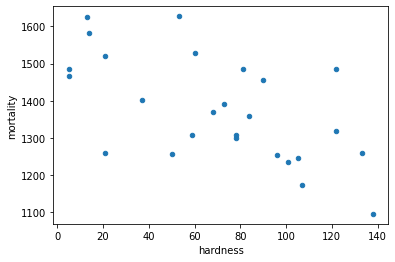

In [ ]:
# визуализируем взаимосвязь жесткости воды и смертности
south.plot(kind='scatter', x='hardness', y='mortality')

In [ ]:
# считаем коэф. корреляции Пирсона
south[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


Обратная связь между показателями еще слабее. Зависимость еще меньше

In [ ]:
# считаем коэф. корреляции Спирмана
south[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [ ]:
# строим модель линейной регрессии
X = south[['hardness']]
y = south['mortality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
X_train.shape

(18, 1)

In [ ]:
X_test.shape

(8, 1)

In [ ]:
y_train.shape

(18,)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [ ]:
model.coef_ # коэффициент детерминации

array([-3.51342921])

In [ ]:
model.intercept_

1640.2204603423374

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([1211.58209643, 1622.65331428, 1271.31039304, 1211.58209643,
       1510.22357948, 1566.43844688, 1432.92813681, 1622.65331428])

In [ ]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

-2.5519223012352077

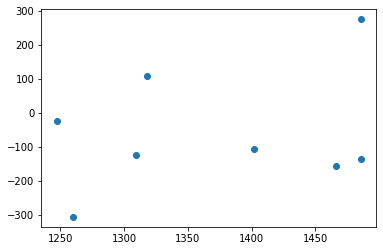

In [ ]:
# визуцализация остатков
err_x = y_test
err_y = y_test - y_pred
plt.scatter(err_x, err_y)

Модель подобрана более точно. Есть небольшая линейная зависимость данных

In [ ]:
# фильтруем данные
north = df.loc[(df['location'] == 'North')]
north.head()

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15


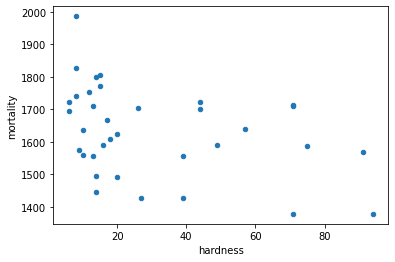

In [ ]:
# визуализируем взаимосвязь жесткости воды и смертности
north.plot(kind='scatter', x='hardness', y='mortality')

In [ ]:
# считаем коэф. корреляции Пирсона
north[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


Связь еще больше стремится к нулю. Либо связь совсем небольшая, либо носит нелинейный характер.

In [ ]:
# считаем коэф. корреляции Спирмана
north[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [ ]:
# строим модель линейной регрессии
X = north[['hardness']]
y = north['mortality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
X_train.shape

(24, 1)

In [ ]:
X_test.shape

(11, 1)

In [ ]:
y_train.shape

(24,)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [ ]:
model.coef_ # коэффициент детерминации

array([-1.97686226])

In [ ]:
model.intercept_

1688.150229031281

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([1672.33533095, 1670.35846869, 1660.47415739, 1676.28905547,
       1656.52043287, 1547.79300857, 1601.16828959, 1672.33533095,
       1611.05260089, 1658.49729513, 1611.05260089])

In [ ]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

0.018885304285745863

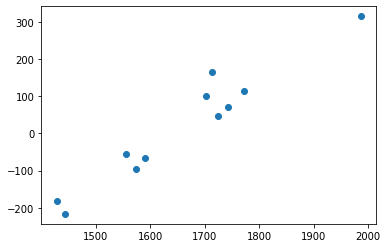

In [ ]:
# визуцализация остатков
err_x = y_test
err_y = y_test - y_pred
plt.scatter(err_x, err_y)

На графике видна системность остатков, данные скорее всего носят нелинейный характер